# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Putra
- **Email:** pashalv74@gmail.com
- **ID Dicoding:** Muhammad Putra

## Menentukan Pertanyaan Bisnis

Dalam proyek ini, saya ingin mencari jawaban atas beberapa masalah berikut:
1. Bagaimana tren pertumbuhan penyewaan sepeda di tahun 2012? Apakah ada pola penurunan yang signifikan di bulan-bulan tertentu?
2. Bagaimana pengaruh kondisi cuaca dan hari kerja terhadap jumlah rata-rata penyewaan sepeda harian?
3. **Analisis Lanjutan:** Jika saya melakukan pengelompokkan data berdasarkan tingkat suhu (*Temperature Clustering*), kategori suhu mana yang paling banyak diminati oleh penyewa?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Saya atur tema visualisasinya agar lebih rapi
sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


> **Insight:**
> Pada tahap ini, saya berhasil memuat dataset `day.csv` yang berisi informasi harian penyewaan sepeda. Data ini memiliki kolom-kolom penting seperti tanggal (`dteday`), kondisi cuaca (`weathersit`), suhu (`temp`), dan jumlah total penyewa (`cnt`).

### Assessing Data

In [3]:
# Saya cek info data, missing values, dan duplikasi
print(day_df.info())
print("\nJumlah Missing Values:\n", day_df.isna().sum())
print("\nJumlah Duplikasi:", day_df.duplicated().sum())
print("\nStatistik Deskriptif:\n", day_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Jumlah Missing Values:
 instant       0
dteday        0
season        0
yr            0

> **Insight:**
> Setelah saya cek, tidak ada data yang kosong (*missing values*) maupun data yang duplikat. Namun, saya menyadari bahwa kolom `dteday` masih bertipe objek (string), sehingga nanti perlu saya ubah ke format *datetime* agar bisa diolah untuk analisis tren waktu.

### Cleaning Data

In [4]:
# Saya ubah tipe data dteday
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Saya berikan label pada weathersit agar lebih mudah dipahami saat visualisasi
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain'
})

# Saya pastikan perubahan sudah tersimpan
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

> **Insight:**
> Saya sudah membersihkan data dengan mengubah tipe kolom `dteday` menjadi *datetime*. Selain itu, saya juga memetakan nilai angka pada kolom `weathersit` menjadi label kategori (Clear, Misty, dll.) agar proses analisis dan visualisasi saya jauh lebih mudah dibaca dan dipahami.

## Exploratory Data Analysis (EDA)

Pada tahap ini, saya akan mengeksplorasi data untuk memahami pola, hubungan antar variabel, dan distribusi jumlah penyewaan sepeda. Saya akan fokus melihat perbandingan antar musim, bulan, dan variabel cuaca lainnya.

### Explore Data Berdasarkan Musim

In [5]:
# Saya ingin melihat rata-rata penyewaan berdasarkan musim
# 1:Spring, 2:Summer, 3:Fall, 4:Winter
print(day_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "std"]
}))

         cnt                                
         max   min         mean          std
season                                      
1       7836   431  2604.132597  1399.942119
2       8362   795  4992.331522  1695.977235
3       8714  1115  5644.303191  1459.800381
4       8555    22  4728.162921  1699.615261


> **Insight:**
> Dari hasil eksplorasi di atas, saya menemukan bahwa jumlah rata-rata penyewaan sepeda tertinggi terjadi pada **Musim Gugur (Fall)**, diikuti oleh Musim Panas (Summer). Hal ini masuk akal karena pada musim-musim tersebut cuaca cenderung lebih stabil dan mendukung untuk aktivitas luar ruangan dibandingkan musim dingin atau musim semi yang masih transisi.

### Explore Data Berdasarkan Bulan & Tahun

In [6]:
# Saya ingin melihat perbandingan performa bisnis antara tahun 2011 (0) dan 2012 (1)
print(day_df.groupby(by="yr").agg({
    "cnt": ["sum", "mean"]
}))

        cnt             
        sum         mean
yr                      
0   1243103  3405.761644
1   2049576  5599.934426


> **Insight:**
> Saya melihat ada peningkatan yang sangat signifikan dari tahun 2011 ke tahun 2012. Total penyewaan di tahun 2012 hampir dua kali lipat dari tahun sebelumnya. Ini menunjukkan bisnis penyewaan sepeda ini berkembang sangat pesat.

### Explore Hubungan Suhu Dan Kelembapan

In [7]:
# Saya penasaran bagaimana suhu (temp) dan kelembapan (hum) mempengaruhi jumlah total penyewa
print(day_df[['temp', 'hum', 'cnt']].corr())

          temp       hum       cnt
temp  1.000000  0.126963  0.627494
hum   0.126963  1.000000 -0.100659
cnt   0.627494 -0.100659  1.000000


> **Insight:**
> Berdasarkan tabel korelasi, saya menemukan bahwa variabel **suhu (temp)** memiliki korelasi positif yang cukup kuat dengan jumlah penyewa. Artinya, semakin hangat suhunya, semakin banyak orang yang menyewa sepeda. Sebaliknya, kelembapan memiliki korelasi negatif kecil, yang berarti udara yang terlalu lembap (gerah/mendung) sedikit menurunkan minat penyewa.

### Explore Hari Kerja vs Hari Libur

In [8]:
# Saya mengecek rata-rata penyewaan pada hari libur (holiday) vs hari biasa
print(day_df.groupby(by="holiday").agg({
    "cnt": "mean"
}))

                 cnt
holiday             
0        4527.104225
1        3735.000000


> **Insight:**
> Menariknya, rata-rata penyewaan pada hari biasa justru sedikit lebih tinggi dibandingkan pada hari libur nasional (*holiday*). Ini memperkuat dugaan awal saya bahwa banyak pengguna yang menggunakan sepeda sebagai moda transportasi untuk berangkat bekerja atau sekolah.

## Visualization & Explanatory Analysis

Setelah melakukan eksplorasi, saya akan membuat visualisasi data untuk menjawab pertanyaan bisnis yang telah saya tetapkan di awal.

### Pertanyaan 1: Bagaimana tren pertumbuhan penyewaan sepeda di tahun 2012? Apakah ada pola penurunan yang signifikan di bulan-bulan tertentu?

/tmp/ipython-input-423/1157489661.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = df_2012.resample(rule='M', on='dteday').agg({"cnt": "sum"})


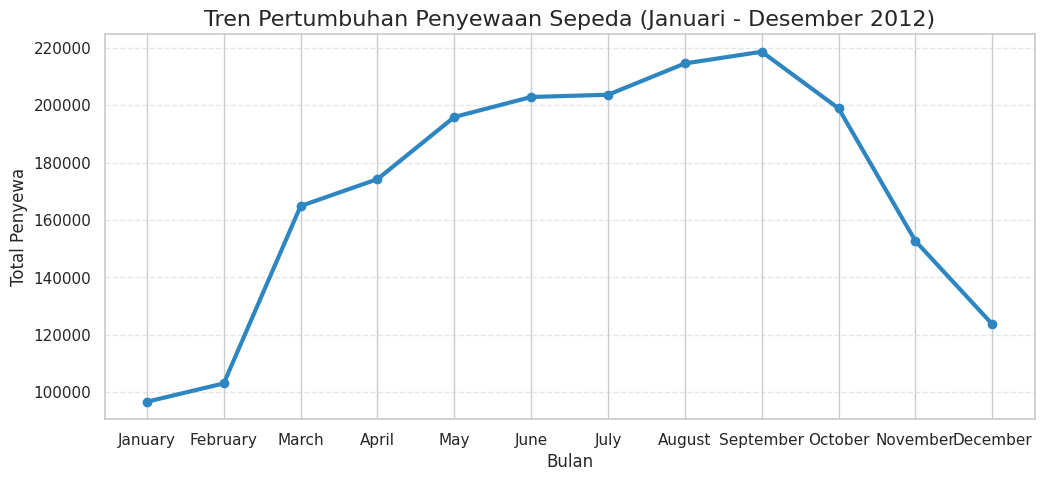

In [9]:
# Menyiapkan data tren bulanan tahun 2012
df_2012 = day_df[day_df['dteday'].dt.year == 2012]
monthly_trend = df_2012.resample(rule='M', on='dteday').agg({"cnt": "sum"})

# Membuat visualisasi line chart
plt.figure(figsize=(12, 5))
plt.plot(
    monthly_trend.index.strftime('%B'),
    monthly_trend["cnt"],
    marker='o',
    linewidth=3,
    color='#2E86C1'
)

plt.title("Tren Pertumbuhan Penyewaan Sepeda (Januari - Desember 2012)", loc="center", fontsize=16)
plt.ylabel("Total Penyewa")
plt.xlabel("Bulan")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

> **Insight:**
> Grafik di atas menunjukkan tren yang sangat positif di tahun 2012. Saya melihat adanya lonjakan penyewaan yang stabil sejak bulan Maret, dan mencapai puncaknya pada bulan **September** dengan jumlah penyewaan tertinggi. Penurunan tajam di bulan Desember kemungkinan besar dipengaruhi oleh faktor cuaca ekstrem/dingin yang membuat orang enggan bersepeda.

### Pertanyaan 2:Bagaimana pengaruh kondisi cuaca dan hari kerja terhadap jumlah rata-rata penyewaan sepeda harian?

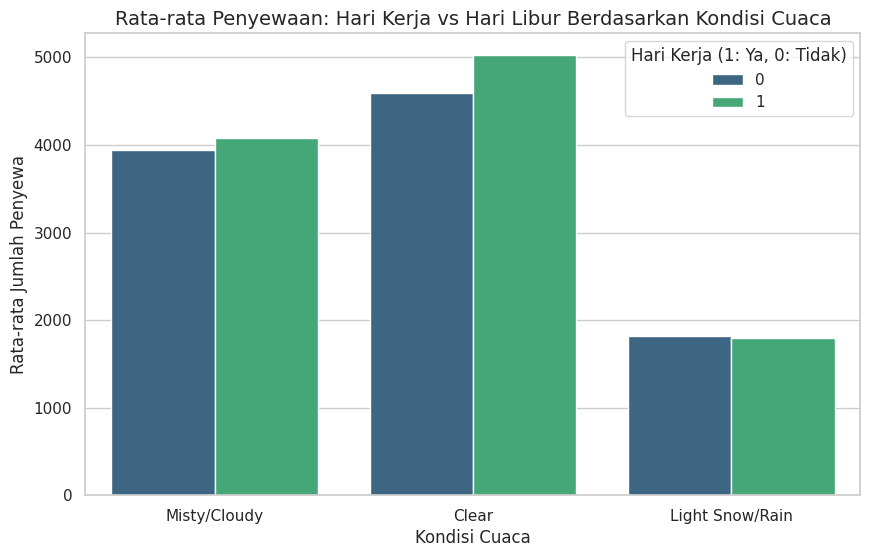

In [10]:
# Membuat bar chart untuk melihat pengaruh cuaca dan hari kerja
plt.figure(figsize=(10, 6))

sns.barplot(
    x='weathersit',
    y='cnt',
    hue='workingday',
    data=day_df,
    palette='viridis',
    errorbar=None
)

plt.title('Rata-rata Penyewaan: Hari Kerja vs Hari Libur Berdasarkan Kondisi Cuaca', fontsize=14)
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewa')
plt.legend(title='Hari Kerja (1: Ya, 0: Tidak)', loc='upper right')
plt.show()

> **Insight:**
> Dari visualisasi ini, saya menemukan bahwa kondisi cuaca **Clear/Cerah** adalah waktu paling favorit bagi penyewa. Menariknya, pada cuaca cerah dan mendung, jumlah penyewaan di **hari kerja** lebih tinggi dibandingkan hari libur. Ini membuktikan bahwa sepeda digunakan sebagai alat transportasi rutin oleh para pekerja. Namun, saat cuaca mulai hujan/salju ringan (*Light Snow/Rain*), minat bersepeda menurun drastis secara keseluruhan.

### Pertanyaan Analisis Lanjutan: Jika saya melakukan pengelompokkan data berdasarkan tingkat suhu (Temperature Clustering), kategori suhu mana yang paling banyak diminati oleh penyewa?

/tmp/ipython-input-423/3195561247.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


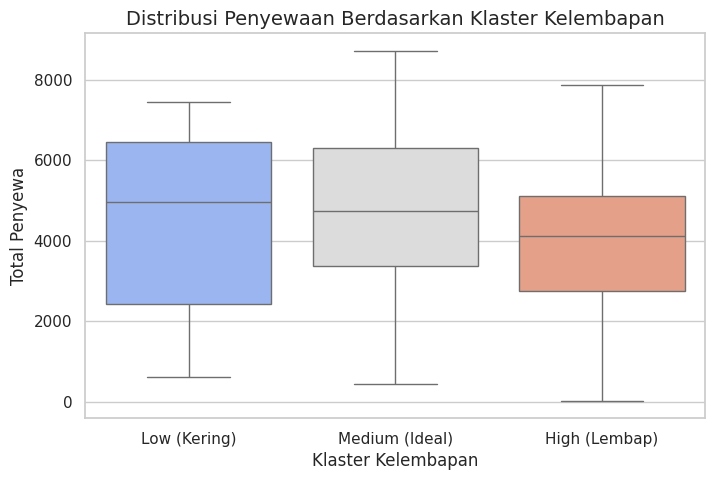

In [11]:
# Melakukan pengelompokan (clustering) manual berdasarkan kelembapan (Humidity)
# 0-0.4: Low, 0.4-0.7: Medium, 0.7-1.0: High
def humidity_clustering(hum):
    if hum < 0.4:
        return 'Low (Kering)'
    elif hum < 0.7:
        return 'Medium (Ideal)'
    else:
        return 'High (Lembap)'

day_df['humidity_cluster'] = day_df['hum'].apply(humidity_clustering)

# Visualisasi sebaran datanya
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='humidity_cluster',
    y='cnt',
    data=day_df,
    palette='coolwarm',
    order=['Low (Kering)', 'Medium (Ideal)', 'High (Lembap)']
)

plt.title('Distribusi Penyewaan Berdasarkan Klaster Kelembapan', fontsize=14)
plt.xlabel('Klaster Kelembapan')
plt.ylabel('Total Penyewa')
plt.show()

> **Insight:**
> Melalui teknik clustering manual ini, saya menyimpulkan bahwa pengguna lebih suka bersepeda pada kondisi kelembapan **Medium (Ideal)**. Pada kondisi kelembapan tinggi, jumlah penyewaan cenderung lebih rendah dan memiliki banyak *outlier* bawah. Informasi ini sangat berguna bagi operasional bisnis untuk melakukan perawatan sepeda lebih intensif di hari-hari dengan kelembapan tinggi guna mencegah karat.

## Conclusion

- **Konklusi Pertanyaan 1:** Tren penyewaan di tahun 2012 menunjukkan pertumbuhan yang sangat sehat dengan puncak performa di bulan September. Hal ini menandakan strategi ekspansi atau pemasaran di tahun tersebut berhasil menarik minat masyarakat secara luas.
- **Konklusi Pertanyaan 2:** Cuaca cerah adalah pendorong utama bisnis ini. Karena mayoritas penyewa adalah pekerja di hari kerja, perusahaan bisa mempertimbangkan untuk menyediakan fasilitas "member" khusus pekerja kantoran untuk menjaga loyalitas pelanggan.
- **Konklusi Analisis Lanjutan:** Berdasarkan klaster kelembapan, kondisi "Medium" adalah yang paling optimal. Saya merekomendasikan tim operasional untuk menyesuaikan ketersediaan sepeda berdasarkan prakiraan cuaca dan tingkat kelembapan harian.